<a href="https://colab.research.google.com/github/SGAMA-77/World_Suicide_Mortality-Analysis/blob/main/EDA_World_Suicide_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: EDA on World Suicide Rates
This project aims at performing exploratory data analysis, cleaning the data by handling missing values and inconsistencies found, and preparing it by creating new features or aggregating data for visualization. The 'world_suicide_rates.csv' dataset is from https://www.kaggle.com/datasets/hammadfarooq470/world-suicide-mortality-data-2000-2021.

## Loading Data


In [13]:
import pandas as pd

df = pd.read_csv('world_suicide_rates.csv')
df.head()

,Country Name,Country Code,Year,Suicide Rate
0,Afghanistan,AFG,2000,4.36
1,Afghanistan,AFG,2001,4.38
2,Afghanistan,AFG,2002,4.26
3,Afghanistan,AFG,2003,4.24
4,Afghanistan,AFG,2004,4.23


## Exploratory Data Analysis

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  5126 non-null   object 
 1   Country Code  5126 non-null   object 
 2   Year          5126 non-null   int64  
 3   Suicide Rate  5126 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 160.3+ KB

--- Descriptive Statistics ---

--- Unique Values for Key Columns ---
Unique values in 'Country Name': 233
Unique values in 'Country Code': 233
Unique values in 'Year': 22

--- Distribution of Suicide Rate ---


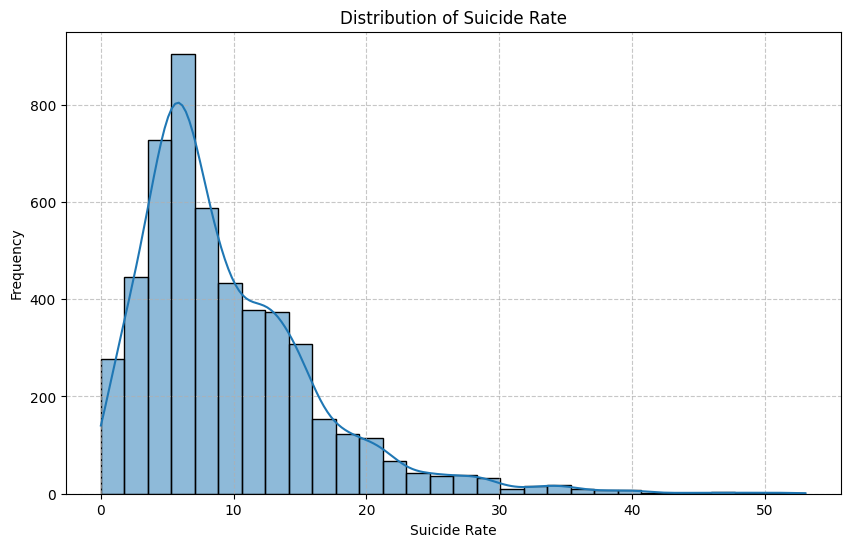


--- First 5 rows of DataFrame after EDA ---


,Country Name,Country Code,Year,Suicide Rate
0,Afghanistan,AFG,2000,4.36
1,Afghanistan,AFG,2001,4.38
2,Afghanistan,AFG,2002,4.26
3,Afghanistan,AFG,2003,4.24
4,Afghanistan,AFG,2004,4.23


In [14]:
print("--- DataFrame Information ---")
df.info()

print("\n--- Descriptive Statistics ---")
df.describe()

print("\n--- Unique Values for Key Columns ---")
print(f"Unique values in 'Country Name': {df['Country Name'].nunique()}")
print(f"Unique values in 'Country Code': {df['Country Code'].nunique()}")
print(f"Unique values in 'Year': {df['Year'].nunique()}")

import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Distribution of Suicide Rate ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['Suicide Rate'], bins=30, kde=True)
plt.title('Distribution of Suicide Rate')
plt.xlabel('Suicide Rate')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\n--- First 5 rows of DataFrame after EDA ---")
df.head()

## Data Cleaning

In [15]:
print("\n--- Checking for Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found in the DataFrame.")
else:
    print("Missing values found in the following columns:")


--- Checking for Missing Values ---
Series([], dtype: int64)
No missing values found in the DataFrame.


Since the data will be later used for creating more visualizations in PowerBI then it's important to standardize column names to snake_case for readability and dashboard compatibility.



In [16]:
print("\n--- Standardizing Column Names ---")
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("\n--- Checking Column Names Consistency ---")
# Check if each 'country_name' maps to a unique 'country_code'
country_mapping_check = df.groupby('country_name')['country_code'].nunique()
inconsistent_countries = country_mapping_check[country_mapping_check > 1]

if not inconsistent_countries.empty:
    print(f"Inconsistent country_code mapping for: {inconsistent_countries.index.tolist()}")
else:
    print("Each country_name maps to a unique country_code.")

# Check if each 'country_code' maps to a unique 'country_name'
code_mapping_check = df.groupby('country_code')['country_name'].nunique()
inconsistent_codes = code_mapping_check[code_mapping_check > 1]

if not inconsistent_codes.empty:
    print(f"Inconsistent country_name mapping for: {inconsistent_codes.index.tolist()}")
else:
    print("Each country_code maps to a unique country_name.")

print("\n--- DataFrame after column name standardization and consistency check ---")
df.head()


--- Standardizing Column Names ---

--- Checking Column Names Consistency ---
Each country_name maps to a unique country_code.
Each country_code maps to a unique country_name.

--- DataFrame after column name standardization and consistency check ---


,country_name,country_code,year,suicide_rate
0,Afghanistan,AFG,2000,4.36
1,Afghanistan,AFG,2001,4.38
2,Afghanistan,AFG,2002,4.26
3,Afghanistan,AFG,2003,4.24
4,Afghanistan,AFG,2004,4.23


## Data Preparation

Preparing the data for dashboard creation by creating new features, aggregating data to a suitable granularity, and ensuring all columns are in appropriate data types.


In [17]:
print("--- Creating new features ---")

# 1. Calculate the global average suicide rate for each year
global_avg_suicide_rate = df.groupby('year')['suicide_rate'].mean().reset_index()
global_avg_suicide_rate.rename(columns={'suicide_rate': 'global_average_suicide_rate'}, inplace=True)
df = pd.merge(df, global_avg_suicide_rate, on='year', how='left')

# 2. For each country, calculate the year-over-year change in the suicide rate
df['suicide_rate_change'] = df.sort_values(by=['country_name', 'year']).groupby('country_name')['suicide_rate'].diff()

print("--- DataFrame with new features ---")
df.head()

--- Creating new features ---
--- DataFrame with new features ---


,country_name,country_code,year,suicide_rate,global_average_suicide_rate,suicide_rate_change
0,Afghanistan,AFG,2000,4.36,10.506066,NaN
1,Afghanistan,AFG,2001,4.38,10.308293,0.02
2,Afghanistan,AFG,2002,4.26,10.277179,-0.12
3,Afghanistan,AFG,2003,4.24,10.157630,-0.02
4,Afghanistan,AFG,2004,4.23,10.034941,-0.01


In [18]:
print("--- Confirming Data Types ---")
df.info()

print("\n--- First 5 rows of Prepared DataFrame ---")
df.head()

--- Confirming Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_name                 5126 non-null   object 
 1   country_code                 5126 non-null   object 
 2   year                         5126 non-null   int64  
 3   suicide_rate                 5126 non-null   float64
 4   global_average_suicide_rate  5126 non-null   float64
 5   suicide_rate_change          4893 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 240.4+ KB

--- First 5 rows of Prepared DataFrame ---


,country_name,country_code,year,suicide_rate,global_average_suicide_rate,suicide_rate_change
0,Afghanistan,AFG,2000,4.36,10.506066,NaN
1,Afghanistan,AFG,2001,4.38,10.308293,0.02
2,Afghanistan,AFG,2002,4.26,10.277179,-0.12
3,Afghanistan,AFG,2003,4.24,10.157630,-0.02
4,Afghanistan,AFG,2004,4.23,10.034941,-0.01


## Visualize Key Findings


--- Global Average Suicide Rate Over Time ---


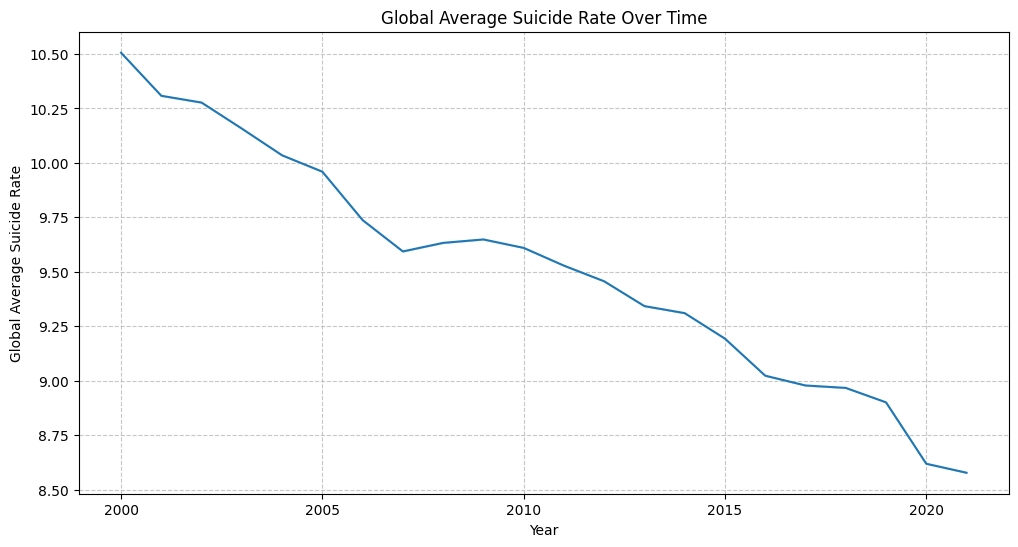

In [19]:
print("\n--- Global Average Suicide Rate Over Time ---")

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='global_average_suicide_rate', data=df)
plt.title('Global Average Suicide Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Global Average Suicide Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


--- Top 10 Countries by Average Suicide Rate ---


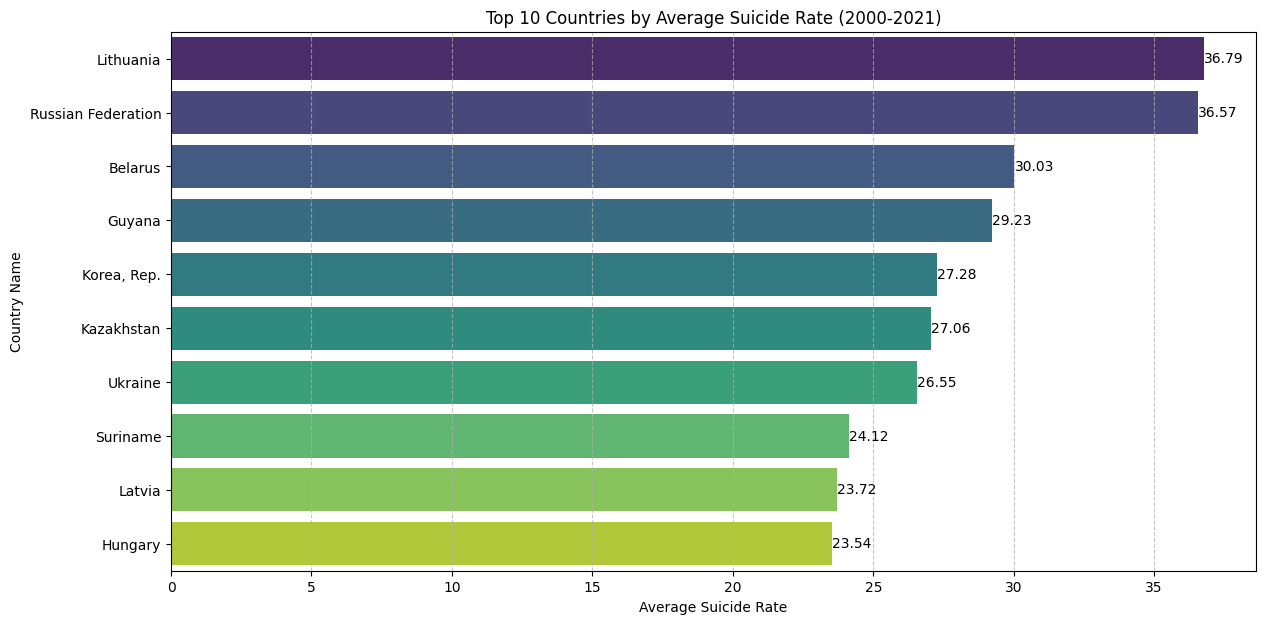

In [21]:
print("\n--- Top 10 Countries by Average Suicide Rate ---")

average_suicide_rate_by_country = df.groupby('country_name')['suicide_rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=average_suicide_rate_by_country.values, y=average_suicide_rate_by_country.index, hue=average_suicide_rate_by_country.index, palette='viridis', legend=False)
plt.title('Top 10 Countries by Average Suicide Rate (2000-2021)')
plt.xlabel('Average Suicide Rate')
plt.ylabel('Country Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()


--- Distribution of Suicide Rate Change (Year-over-Year) ---


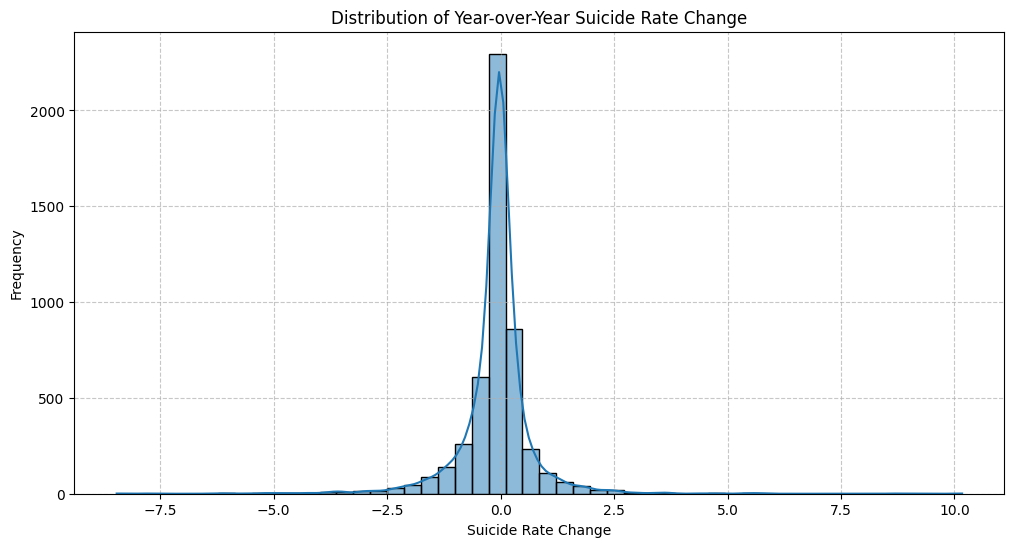

In [22]:
print("\n--- Distribution of Suicide Rate Change (Year-over-Year) ---")

plt.figure(figsize=(12, 6))
sns.histplot(df['suicide_rate_change'].dropna(), bins=50, kde=True)
plt.title('Distribution of Year-over-Year Suicide Rate Change')
plt.xlabel('Suicide Rate Change')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Save Cleaned Data




In [23]:
print("--- Saving cleaned and prepared data to CSV ---")
df.to_csv('cleaned_world_suicide_rates.csv', index=False)
print("Data saved to 'cleaned_world_suicide_rates.csv' successfully.")

--- Saving cleaned and prepared data to CSV ---
Data saved to 'cleaned_world_suicide_rates.csv' successfully.


## Summary:

*   **Data Cleaning and Preparation Steps:**
    *   The `world_suicide_rates.csv` dataset was loaded, initially containing `Country Name`, `Country Code`, `Year`, and `Suicide Rate` columns.
    *   Missing values were checked, and none were found in the dataset.
    *   Column names were standardized to `snake_case` (e.g., `country_name`, `suicide_rate`) for better readability and dashboard compatibility.
    *   Consistency checks confirmed that each `country_name` maps to a unique `country_code` and vice-versa.
    *   New features were created: `global_average_suicide_rate` (mean suicide rate across all countries per year) and `suicide_rate_change` (year-over-year change in suicide rate per country).
    *   All columns, including the new ones, were confirmed to have appropriate data types for analysis.
*   **Confirmation of Dataset's Readiness for Dashboard Creation:**
    *   Yes, the dataset is confirmed to be ready for dashboard creation in tools like PowerBI or Tableau. It is free of missing values, has standardized column names, consistent country mappings, and includes new, insightful features for deeper analysis. The cleaned and prepared data has been saved to `cleaned_world_suicide_rates.csv`.
*   **Key Insights Gained During Exploratory Analysis:**
    *   The dataset covers 233 unique countries and 22 distinct years.
    *   Initial exploration confirmed no missing values in the primary columns.
    *   The distribution of `Suicide Rate` was visualized, providing an initial understanding of its spread.

### Data Analysis Key Findings
*   The dataset contains 5126 entries and 4 initial columns: `Country Name`, `Country Code`, `Year`, and `Suicide Rate`.
*   No missing values were identified in any of the columns throughout the cleaning process.
*   Column names were successfully standardized to `snake_case` (e.g., `country_name`, `country_code`, `year`, `suicide_rate`).
*   Each `country_name` consistently maps to a unique `country_code`, and vice-versa, ensuring data integrity for country identification.
*   Two new features were successfully engineered:
    *   `global_average_suicide_rate`: The average suicide rate across all countries for each year.
    *   `suicide_rate_change`: The year-over-year change in suicide rate for each country.
*   Visualizations were generated including a line plot showing the global average suicide rate trend over time, a bar chart identifying the top 10 countries by average suicide rate, and a histogram illustrating the distribution of year-over-year suicide rate changes.
*   The cleaned and prepared dataset, now with 6 columns, was saved as `cleaned_world_suicide_rates.csv` for dashboarding.

### Insights or Next Steps
*   The prepared dataset is robust and enriched with features essential for comprehensive time-series and comparative analysis in a dashboard environment.
*   Further analysis could explore country-specific suicide rate trends, correlations with other socio-economic factors, or delve into the top 10 countries identified by average suicide rate to understand underlying patterns.
